# Task
Perform time series forecasting on the "ETTh1.csv" dataset to predict the 'OT' (load) variable using an LSTM model, and then evaluate the model's performance.

In [ ]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Inverse transform to original scale
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

print("Predictions done.")

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Predictions done.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

# Safe MAPE (avoid divide by zero)
epsilon = 1e-8
mape = np.mean(np.abs((y_test_actual - y_pred_actual) /
                      np.where(y_test_actual == 0, epsilon, y_test_actual))) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 0.45495139529350503
RMSE: 0.6629597412973721
MAPE: 47844562.26352027


In [ ]:
print("Min actual value:", y_test_actual.min())
print("Max actual value:", y_test_actual.max())

Min actual value: -0.9150000214576719
Max actual value: 17.165000915527347


In [ ]:
# 1️⃣ Predict
y_pred = model.predict(X_test)

# 2️⃣ Reshape y_test correctly
y_test_reshaped = y_test.reshape(-1, 1)

# 3️⃣ Inverse transform BOTH
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test_reshaped)

# 4️⃣ Check values
print("Min actual value:", y_test_actual.min())
print("Max actual value:", y_test_actual.max())

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Min actual value: -0.9150000214576719
Max actual value: 17.165000915527347


In [ ]:
print("Original CSV min:", df["Load"].min())
print("Original CSV max:", df["Load"].max())

KeyError: 'Load'

In [ ]:
def smape(y_true, y_pred):
    return 100 * np.mean(
        2 * np.abs(y_pred - y_true) /
        (np.abs(y_true) + np.abs(y_pred) + 1e-8)
    )

smape_value = smape(y_test_actual, y_pred_actual)

print("MAE:", mae)
print("RMSE:", rmse)
print("sMAPE:", smape_value)


MAE: 0.45495139529350503
RMSE: 0.6629597412973721
sMAPE: 9.805634148579925


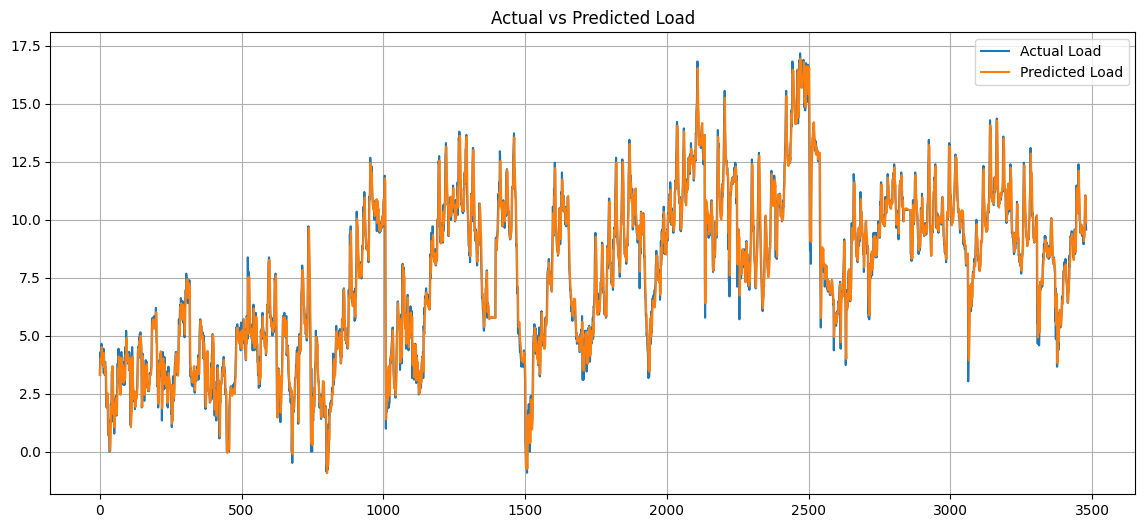

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test_actual, label="Actual Load")
plt.plot(y_pred_actual, label="Predicted Load")
plt.legend()
plt.title("Actual vs Predicted Load")
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


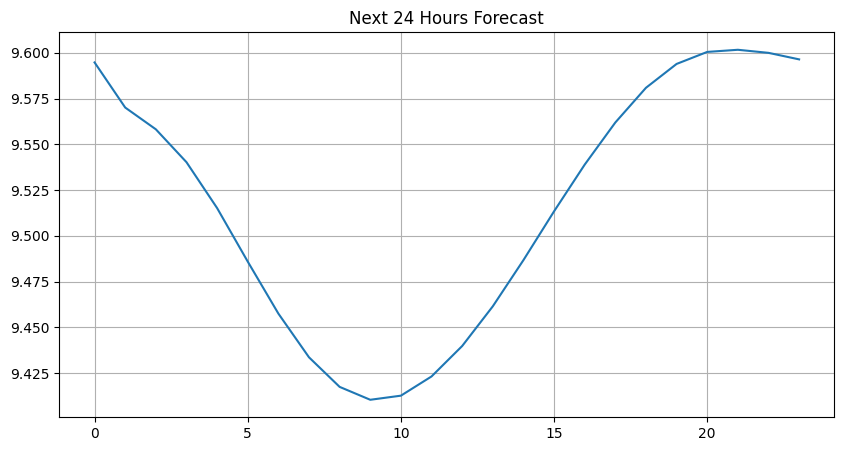

In [ ]:
# Take last 24 values
last_24 = load_data_scaled[-24:]

future_predictions = []
current_input = last_24.reshape(1, 24, 1)

for i in range(24):
    next_pred = model.predict(current_input)[0][0]
    future_predictions.append(next_pred)
    current_input = np.append(current_input[:,1:,:],
                              [[[next_pred]]], axis=1)

# Convert back to original scale
future_predictions = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1,1)
)

plt.figure(figsize=(10,5))
plt.plot(future_predictions)
plt.title("Next 24 Hours Forecast")
plt.grid(True)
plt.show()

In [ ]:
import joblib

model.save("load_forecast_model.h5")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [ ]:
from google.colab import files

files.download("load_forecast_model.h5")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Load and Prepare Data

### Subtask:
Load the 'ETTh1.csv' dataset using pandas, convert the date column to datetime format, sort the data by time, and handle any missing values. Select the 'OT' column as the main load (target) variable.


**Reasoning**:
First, I'll import the pandas library to handle data manipulation. Then, I will load the 'ETTh1.csv' dataset into a DataFrame, convert the 'date' column to datetime objects, sort the DataFrame by date, check for and handle missing values, and finally select the 'OT' column as the target variable.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/ETTh1.csv')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df = df.sort_values(by='date')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values[missing_values > 0])

# Drop rows with missing values if any
df.dropna(inplace=True)

missing_values_after = df.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after[missing_values_after > 0])

# Select the 'OT' column as the main load (target) variable
load_data = df['OT']

print("\nDataFrame head after preprocessing:")
print(df.head())
print("\nSelected 'OT' column (first 5 values):")
print(load_data.head())

Missing values before handling:
 Series([], dtype: int64)

Missing values after handling:
 Series([], dtype: int64)

DataFrame head after preprocessing:
                 date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0 2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1 2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2 2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
3 2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
4 2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000

Selected 'OT' column (first 5 values):
0    30.531000
1    27.787001
2    27.787001
3    25.044001
4    21.948000
Name: OT, dtype: float64


## Normalize Target Variable

### Subtask:
Normalize the selected target column ('OT') using a suitable scaling method (e.g., MinMaxScaler) to prepare it for the neural network.


**Reasoning**:
To normalize the 'OT' column, I need to import the MinMaxScaler, instantiate it, reshape the data, and then apply the fit_transform method. Finally, I will print the first few values to verify the scaling.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Reshape load_data for the scaler (expects 2D input)
load_data_reshaped = load_data.values.reshape(-1, 1)

# Apply the scaler to the reshaped load_data
load_data_scaled = scaler.fit_transform(load_data_reshaped)

# Convert back to a Series for consistency or keep as array if preferred for next steps
# For now, let's keep it as a numpy array, as it's common for neural network inputs
# If a Series is strictly required for later steps, it can be converted back: pd.Series(load_data_scaled.flatten())

print("First 5 normalized 'OT' values:")
print(load_data_scaled[:5])

First 5 normalized 'OT' values:
[[0.69101763]
 [0.63623297]
 [0.63623297]
 [0.58146826]
 [0.5196558 ]]


## Plot Historical Load Data

### Subtask:
Generate a plot to visualize the historical load data from the 'OT' column, including legends, to understand its patterns and trends.


**Reasoning**:
To visualize the historical load data, I will use `matplotlib.pyplot` to create a line plot of the `load_data` Series, add appropriate labels and a title, and then display the plot.



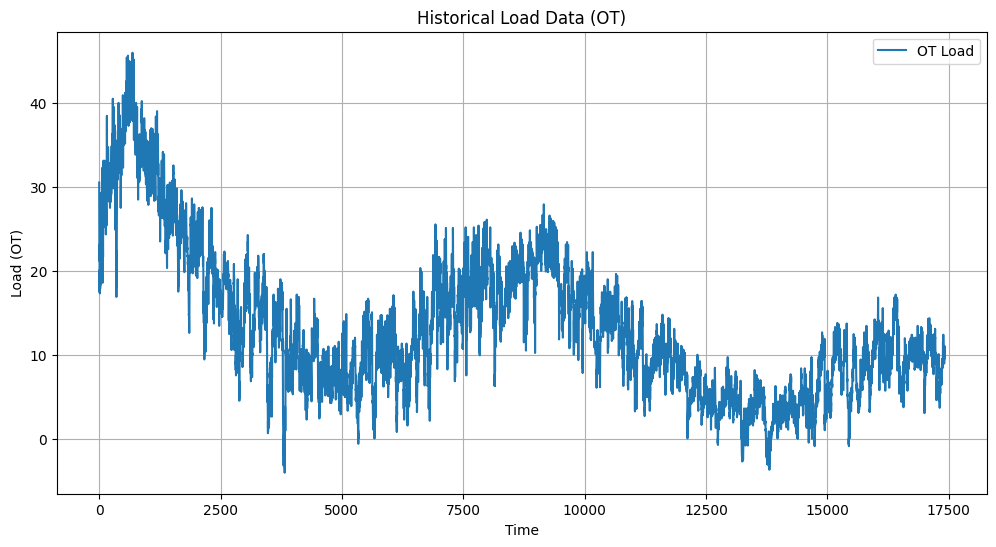

In [ ]:
import matplotlib.pyplot as plt

# Create a line plot of the load_data Series
plt.figure(figsize=(12, 6))
plt.plot(load_data)

# Add a title and labels
plt.title('Historical Load Data (OT)')
plt.xlabel('Time')
plt.ylabel('Load (OT)')

# Add a legend for clarity (though only one series here)
plt.legend(['OT Load'])

# Display the plot
plt.grid(True)
plt.show()


## Create Time Series Sequences

### Subtask:
Prepare the data for LSTM by creating time-series sequences. This involves defining a lookback window of 24 hours, meaning each input sequence will consist of 24 previous hourly load values to predict the next value.


**Reasoning**:
To prepare the data for the LSTM model, I will create time-series sequences by defining a lookback window, iterating through the scaled load data, and populating input sequences (X) and target values (y). Finally, I will convert them into NumPy arrays with the required shapes for LSTM input.



In [ ]:
import numpy as np

# 1. Define a variable lookback_window and set its value to 24.
lookback_window = 24

# 2. Initialize two empty lists, X and y, to store the input sequences and target values, respectively.
X = []
y = []

# 3. Iterate through the load_data_scaled array, starting from the lookback_window index up to the end of the array.
for i in range(lookback_window, len(load_data_scaled)):
    # 4. In each iteration, extract a slice of load_data_scaled of length lookback_window as the input sequence and append it to X.
    # The input sequence should be reshaped to include a feature dimension (e.g., [lookback_window, 1]).
    X.append(load_data_scaled[i-lookback_window:i, 0]) # Extracting the 'OT' feature for the window
    # 5. Extract the next value from load_data_scaled as the target and append it to y.
    y.append(load_data_scaled[i, 0]) # The next 'OT' value

# 6. Convert the lists X and y into NumPy arrays.
X, y = np.array(X), np.array(y)

# Ensure X has the shape (number_of_samples, lookback_window, 1) and y has the shape (number_of_samples,).
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print(f"Shape of X (input sequences): {X.shape}")
print(f"Shape of y (target values): {y.shape}")

print("\nFirst 5 input sequences (X):")
print(X[:5])
print("\nFirst 5 target values (y):")
print(y[:5])

Shape of X (input sequences): (17396, 24, 1)
Shape of y (target values): (17396,)

First 5 input sequences (X):
[[[0.69101763]
  [0.63623297]
  [0.63623297]
  [0.58146826]
  [0.5196558 ]
  [0.50420268]
  [0.53650647]
  [0.54353423]
  [0.51404556]
  [0.42977218]
  [0.4803442 ]
  [0.48313933]
  [0.46489109]
  [0.45225309]
  [0.47189889]
  [0.4269571 ]
  [0.47050133]
  [0.46347357]
  [0.49437976]
  [0.45504821]
  [0.43819754]
  [0.44101265]
  [0.44101265]
  [0.47613152]]

 [[0.63623297]
  [0.63623297]
  [0.58146826]
  [0.5196558 ]
  [0.50420268]
  [0.53650647]
  [0.54353423]
  [0.51404556]
  [0.42977218]
  [0.4803442 ]
  [0.48313933]
  [0.46489109]
  [0.45225309]
  [0.47189889]
  [0.4269571 ]
  [0.47050133]
  [0.46347357]
  [0.49437976]
  [0.45504821]
  [0.43819754]
  [0.44101265]
  [0.44101265]
  [0.47613152]
  [0.50280512]]

 [[0.63623297]
  [0.58146826]
  [0.5196558 ]
  [0.50420268]
  [0.53650647]
  [0.54353423]
  [0.51404556]
  [0.42977218]
  [0.4803442 ]
  [0.48313933]
  [0.46489109]

## Train-Test Split

### Subtask:
Perform a time-based train-test split, ensuring 80% of the data is used for training and 20% for testing. It is crucial to maintain the temporal order of the data for this split.


**Reasoning**:
To perform a time-based train-test split, I will first calculate the split index based on the desired 80-20 ratio. Then, I will use this index to divide both the input sequences (X) and target values (y) into training and testing sets, maintaining their temporal order. Finally, I will print the shapes of these new datasets to verify the split.



In [ ]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (13916, 24, 1)
Shape of X_test: (3480, 24, 1)
Shape of y_train: (13916,)
Shape of y_test: (3480,)


## Build LSTM Model

### Subtask:
Construct an LSTM model using TensorFlow/Keras. The model should include LSTM layers and Dropout layers to prevent overfitting. Define the input shape based on the lookback window.


**Reasoning**:
To construct the LSTM model, I will import necessary components from TensorFlow/Keras, then define a Sequential model with two LSTM layers, two Dropout layers, and a final Dense output layer, setting the input shape based on the training data.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# 2. Initialize a Sequential model.
model = Sequential()

# 3. Add the first LSTM layer.
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# 4. Add a Dropout layer.
model.add(Dropout(0.2))

# 5. Add a second LSTM layer.
model.add(LSTM(units=50, return_sequences=False))

# 6. Add another Dropout layer.
model.add(Dropout(0.2))

# 7. Add a Dense output layer.
model.add(Dense(units=1))

# 8. Print the model summary.
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The model has been built successfully, as indicated by the model summary output. The next logical step is to compile the model by specifying an optimizer, a loss function, and optionally, metrics to monitor during training.



In [ ]:
import tensorflow as tf

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

print("Model compiled successfully with Adam optimizer and Mean Squared Error loss.")

Model compiled successfully with Adam optimizer and Mean Squared Error loss.


## Compile and Train Model

### Subtask:
Train the LSTM model on the training data for 20-50 epochs, incorporating EarlyStopping to monitor validation loss and prevent overfitting.


**Reasoning**:
To train the LSTM model, I will first instantiate the `EarlyStopping` callback, then use the `model.fit()` method with the specified training data, epochs, batch size, validation split, and the EarlyStopping callback, storing the training history.



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# 1. Instantiate EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Number of epochs with no improvement after which training will be stopped.
    restore_best_weights=True  # Whether to restore model weights from the epoch with the best value of the monitored quantity.
)

# 2. Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,  # Specify the number of epochs (e.g., 50)
    batch_size=32,  # Specify the batch size (e.g., 32)
    validation_split=0.2,  # Use 20% of the training data for validation
    callbacks=[early_stopping], # Include the EarlyStopping callback
    verbose=1
)

print("Model training complete. Training history stored in 'history' variable.")

Epoch 1/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - loss: 0.0184 - val_loss: 6.0621e-04
Epoch 2/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0031 - val_loss: 5.0087e-04
Epoch 3/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0025 - val_loss: 3.9192e-04
Epoch 4/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0020 - val_loss: 3.4372e-04
Epoch 5/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0017 - val_loss: 2.7633e-04
Epoch 6/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0015 - val_loss: 2.4915e-04
Epoch 7/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0013 - val_loss: 2.6314e-04
Epoch 8/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0012 - val_loss: 2.1783e-04
Epoch 9/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0010 - val_loss: 2.2545e-04
Epoch 10/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 9.9478e-04 - val_loss: 1.9008e-04
Epoch 11/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 8.7945e-04 - val_l